In [2]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import requests
import json 
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

import plotly.express as pex
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import FeatureAgglomeration

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

from statsmodels.stats.weightstats import ztest as ztest

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

### Connection to API

In [115]:
CLIENT_ID = "e83d3836d10b4d06a00845db78de3dfb"
CLIENT_SECRET = "6aab53d5a2074b6d9552fb767cdf142c"

auth_manager = SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET
)
spotify = spotipy.Spotify(client_credentials_manager=auth_manager)

### Function to bring in playlists

In [4]:
def playlisttodf(x):
    playlist=pd.DataFrame(spotify.playlist_items(x))
    flatten_1=pd.json_normalize(playlist['items'])
    songlist=[]
    for i in flatten_1['track.external_urls.spotify']:
        songlist.append(spotify.audio_features(i))
    df=pd.DataFrame(songlist)
    flatten_2=pd.json_normalize(df[0])
    final_playlist=pd.concat(((flatten_1['track.name']),flatten_2),axis=1)
    final_playlist['track_number_inlist']=final_playlist.index+1
    final_playlist['minutestamp']=(final_playlist['duration_ms'].cumsum())/60000
    y=spotify.playlist(x)['name']
    final_playlist['original_playlist']= y
    return final_playlist


### Function to visualize playlist's features

In [113]:
def visualizer(x):
    sfeat=['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
    scaler = StandardScaler()
    scaler.fit(x[sfeat])
    vis = pd.DataFrame(
    scaler.transform(x[sfeat]), columns=scaler.feature_names_in_)
    vis['minutestamp']=x['minutestamp']
    return sns.pairplot(vis,y_vars=['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],x_vars=['minutestamp'])

Marathons by others

In [6]:
marathons_list=[
           'https://open.spotify.com/playlist/1X0YrBQgTEv4ANBUgpLCJr',
           'https://open.spotify.com/playlist/5lUOuqNxY8WJfMe9Nv5tDB',
           'https://open.spotify.com/playlist/4yIBTubggfMFHzkmSjjG72',
           'https://open.spotify.com/playlist/3tDmOy5nZSwhLnKCdl0b8s',
           'https://open.spotify.com/playlist/3OwazfLhODPTZgWHsjdiWY',
           'https://open.spotify.com/playlist/2sEk7UvY4KdIpPlTYez1Gk',
           'https://open.spotify.com/playlist/37i9dQZF1DZ06evO2ZhYVW',   
]

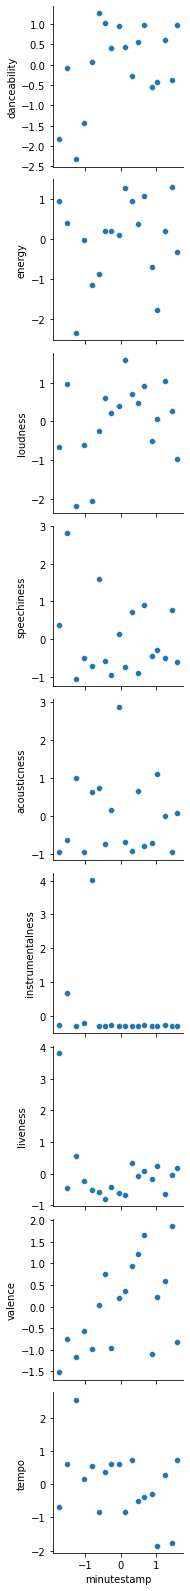

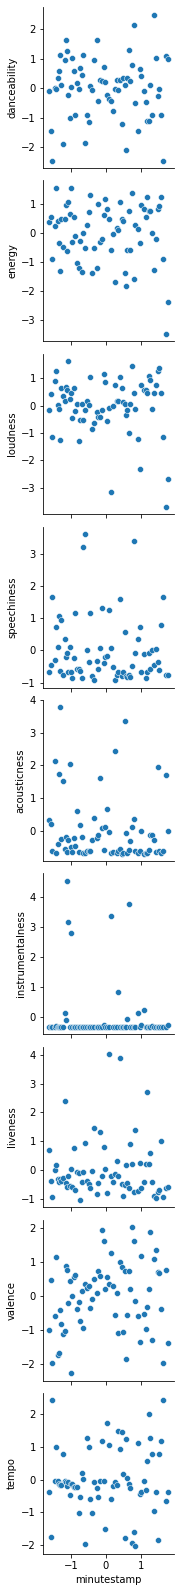

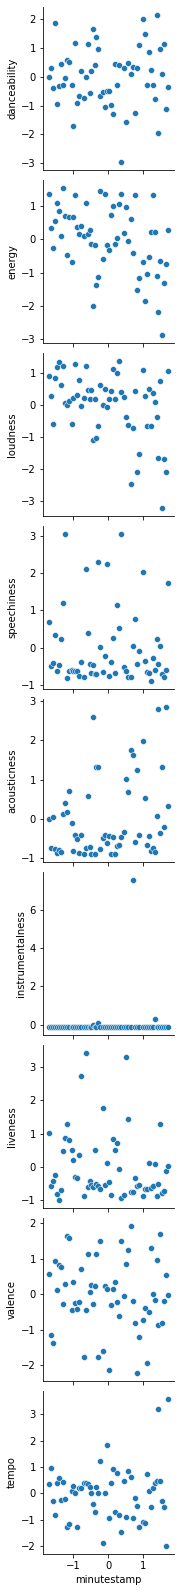

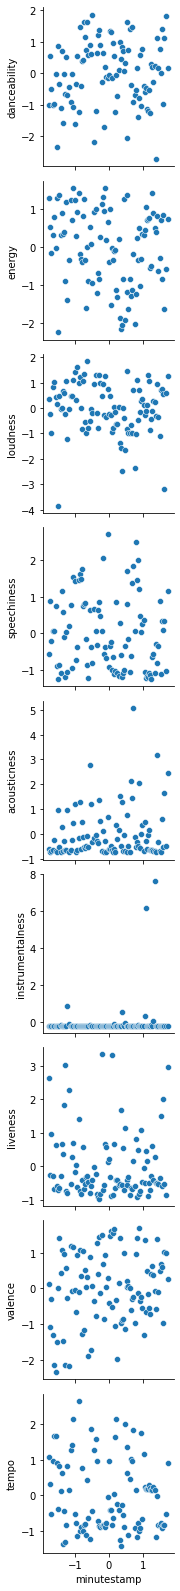

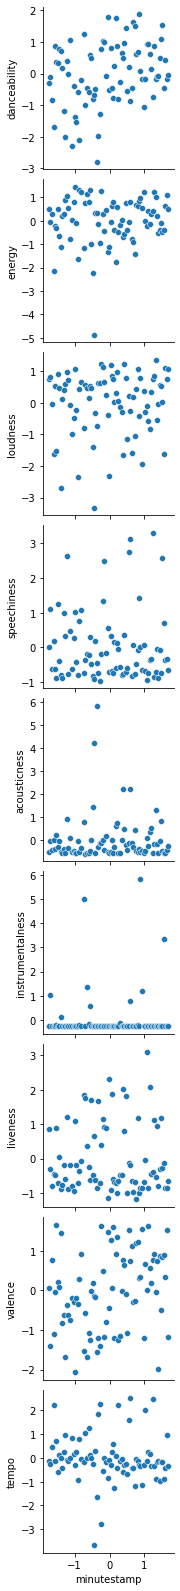

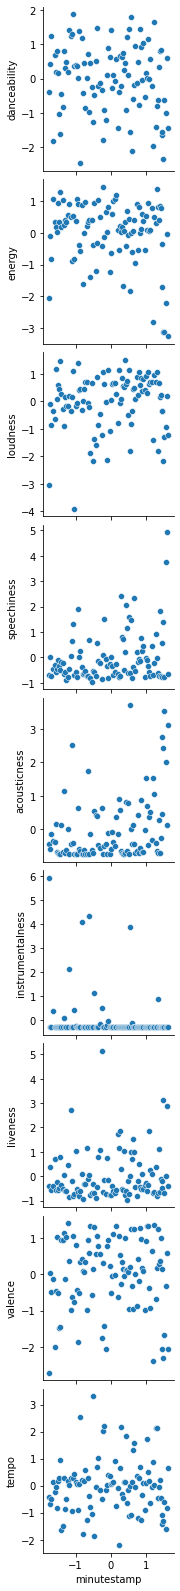

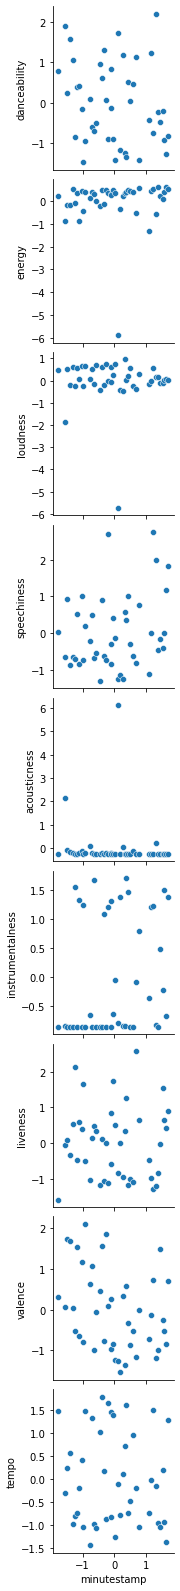

In [7]:
for i in marathons_list:
    x=playlisttodf(i)
    visualizer(x)

In [116]:
test=[]
for i in marathons_list:
    x=playlisttodf(i)
    test.append(x)

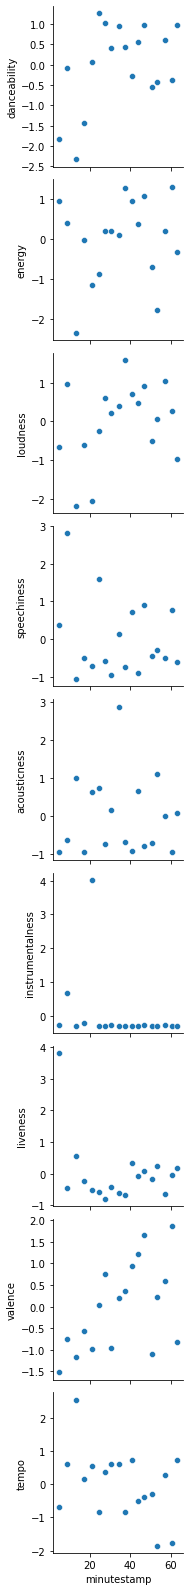

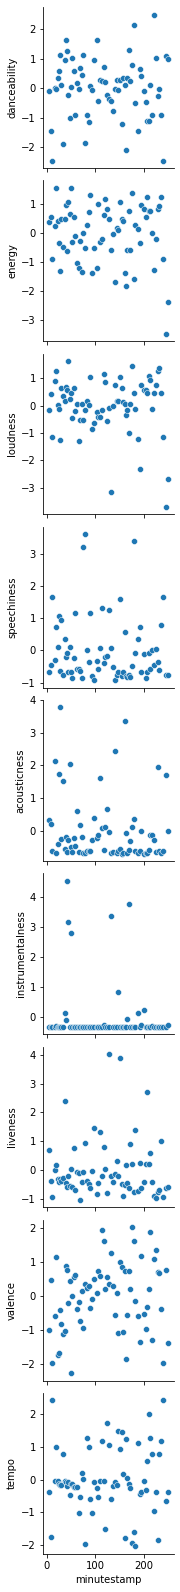

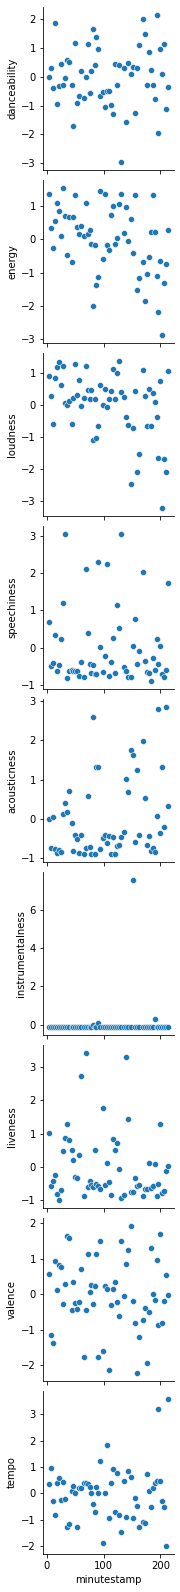

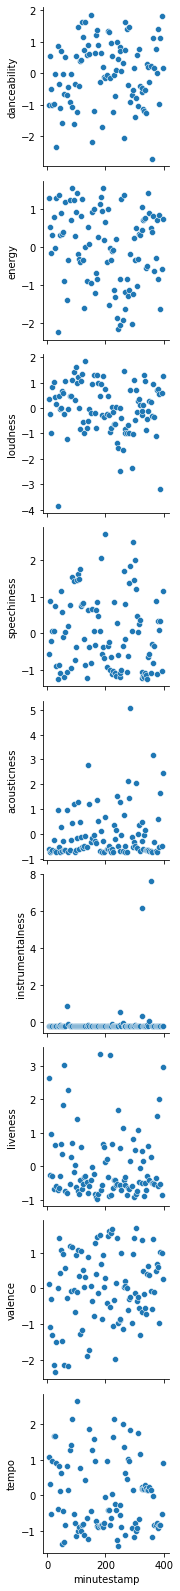

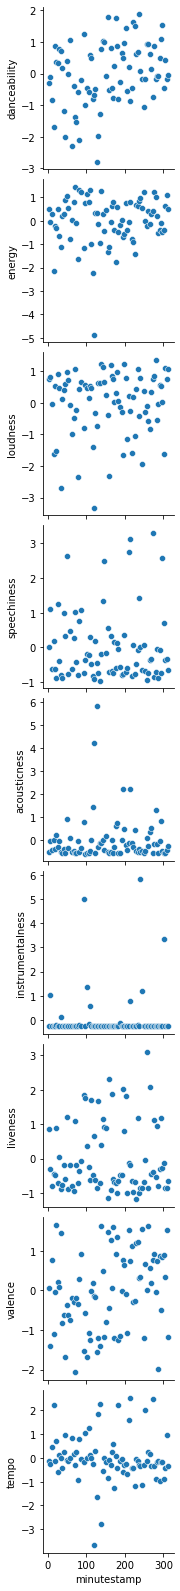

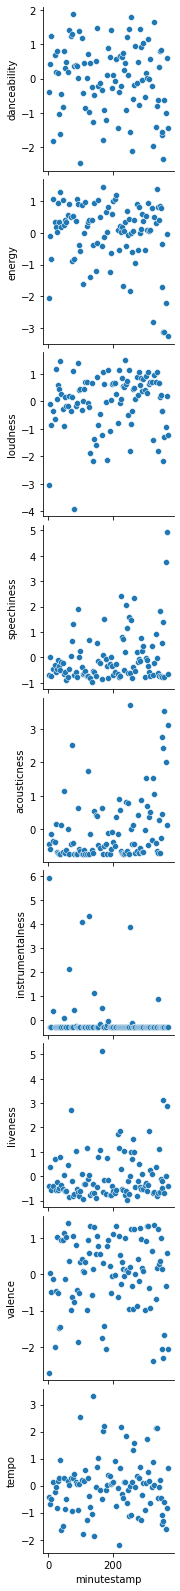

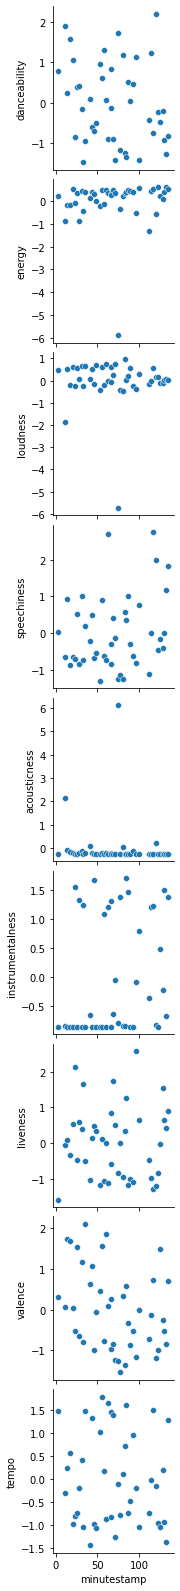

In [117]:
for i in range(7):
    visualizer(test[i]).savefig(f"Playlist{i}.png")

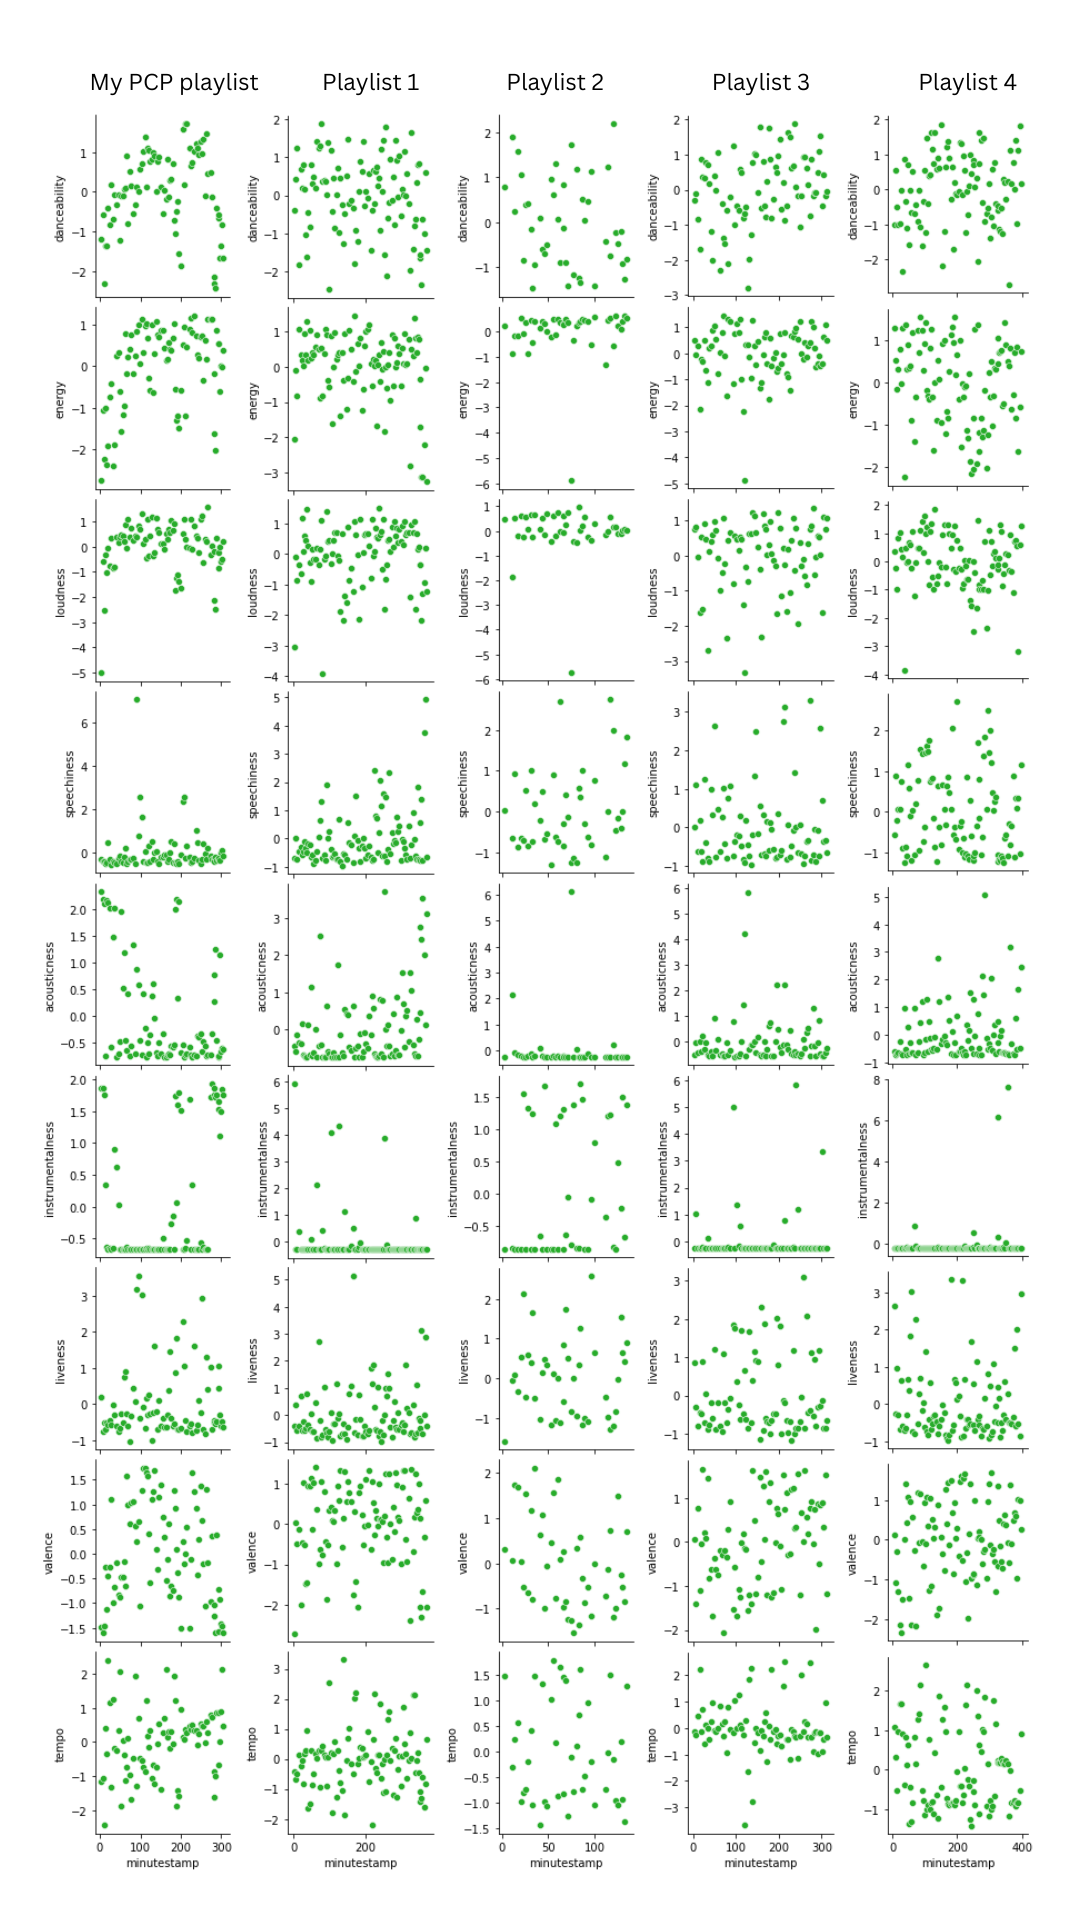

My perfectly crafted marathon playlist. 


In [8]:
PCP='https://open.spotify.com/playlist/2CPap0lQiK320ROUnBzxKk'

In [9]:
marathon=playlisttodf(PCP)

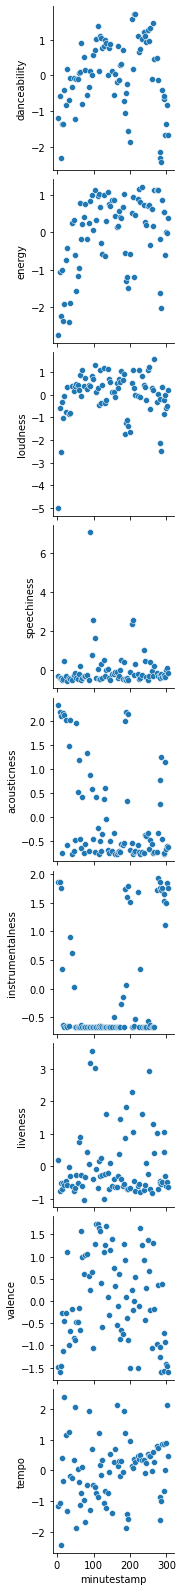

In [118]:
visualizer(marathon).savefig("My_PCP_Playlist.png")

In [10]:
marathon.head()

track.name  danceability  energy  \
0                            A Model of the Universe         0.336   0.044   
1                                         Experience         0.447   0.449   
2  Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10...         0.136   0.164   
3                La Vida Es Bella - La Vida Es Bella         0.305   0.460   
4                                        I'm on Fire         0.307   0.136   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    7   -29.255     0       0.0456       0.98200            0.9600    0.2210   
1    2   -10.634     1       0.0376       0.93400            0.9610    0.0697   
2    4   -18.756     0       0.0364       0.91100            0.9160    0.1090   
3    2    -9.463     1       0.0295       0.00468            0.3800    0.0777   
4    3   -12.474     1       0.0341       0.92800            0.0122    0.1090   

   ...            type                      id  \
0  ...  audio_features  5ay0cvjtVAbMLOe8gTadFh   
1  ...  audio_features  1BncfTJAWxrsxyT9culBrj   
2  ...  audio_features  2xizRhme7pYeITbH1NLLGt   
3  ...  audio_features  5sgRJe0Z1ol9wvSSsXcGaf   
4  ...  audio_features  7uMVMpAmxxq44QskyMoUU9   

                                    uri  \
0  spotify:track:5ay0cvjtVAbMLOe8gTadFh   
1  spotify:track:1BncfTJAWxrsxyT9culBrj   
2  spotify:track:2xizRhme7pYeITbH1NLLGt   
3  spotify:track:5sgRJe0Z1ol9wvSSsXcGaf   
4  spotify:track:7uMVMpAmxxq44QskyMoUU9   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/5ay0cvjtVAbM...   
1  https://api.spotify.com/v1/tracks/1BncfTJAWxrs...   
2  https://api.spotify.com/v1/tracks/2xizRhme7pYe...   
3  https://api.spotify.com/v1/tracks/5sgRJe0Z1ol9...   
4  https://api.spotify.com/v1/tracks/7uMVMpAmxxq4...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/5ay0...      172444   
1  https://api.spotify.com/v1/audio-analysis/1Bnc...      315427   
2  https://api.spotify.com/v1/audio-analysis/2xiz...      166867   
3  https://api.spotify.com/v1/audio-analysis/5sgR...      169333   
4  https://api.spotify.com/v1/audio-analysis/7uMV...      164323   

  time_signature  track_number_inlist  minutestamp  original_playlist  
0              4                    1     2.874067       PCP_Marathon  
1              4                    2     8.131183       PCP_Marathon  
2              4                    3    10.912300       PCP_Marathon  
3              4                    4    13.734517       PCP_Marathon  
4              3                    5    16.473233       PCP_Marathon  

[5 rows x 22 columns]

In [11]:
sfeat=['danceability', 'energy', 'loudness','speechiness',
       'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']

Standarize your important features

In [12]:
scaler = StandardScaler()
scaler.fit(marathon[sfeat])
marathon_sca = pd.DataFrame(
    scaler.transform(marathon[sfeat]), columns=scaler.feature_names_in_
)

Do PCA on your features to find an underlying relationship to time.

Fit the PCA to your perfectly crafted playlist.

In [13]:
Marathon_pca = PCA(n_components= 2)
Marathon_pca.fit(marathon_sca)

PCA(n_components=2)

In [14]:
Marathon_transformed= pd.DataFrame(
    Marathon_pca.transform(marathon_sca),
    columns=["PC" + str(i) for i in range(Marathon_pca.n_components_)],
)

In [15]:
Marathon_transformed.head()

PC0       PC1
0  6.072221  1.669228
1  3.299471  0.372181
2  5.379775  1.365467
3  1.230501 -1.127401
4  3.170219  0.733769

Concat results and original into a new data set. 

In [16]:
MARATHON=pd.concat((marathon,Marathon_transformed),axis=1)

In [17]:
MARATHON.head()

track.name  danceability  energy  \
0                            A Model of the Universe         0.336   0.044   
1                                         Experience         0.447   0.449   
2  Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10...         0.136   0.164   
3                La Vida Es Bella - La Vida Es Bella         0.305   0.460   
4                                        I'm on Fire         0.307   0.136   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    7   -29.255     0       0.0456       0.98200            0.9600    0.2210   
1    2   -10.634     1       0.0376       0.93400            0.9610    0.0697   
2    4   -18.756     0       0.0364       0.91100            0.9160    0.1090   
3    2    -9.463     1       0.0295       0.00468            0.3800    0.0777   
4    3   -12.474     1       0.0341       0.92800            0.0122    0.1090   

   ...                                   uri  \
0  ...  spotify:track:5ay0cvjtVAbMLOe8gTadFh   
1  ...  spotify:track:1BncfTJAWxrsxyT9culBrj   
2  ...  spotify:track:2xizRhme7pYeITbH1NLLGt   
3  ...  spotify:track:5sgRJe0Z1ol9wvSSsXcGaf   
4  ...  spotify:track:7uMVMpAmxxq44QskyMoUU9   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/5ay0cvjtVAbM...   
1  https://api.spotify.com/v1/tracks/1BncfTJAWxrs...   
2  https://api.spotify.com/v1/tracks/2xizRhme7pYe...   
3  https://api.spotify.com/v1/tracks/5sgRJe0Z1ol9...   
4  https://api.spotify.com/v1/tracks/7uMVMpAmxxq4...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/5ay0...      172444   
1  https://api.spotify.com/v1/audio-analysis/1Bnc...      315427   
2  https://api.spotify.com/v1/audio-analysis/2xiz...      166867   
3  https://api.spotify.com/v1/audio-analysis/5sgR...      169333   
4  https://api.spotify.com/v1/audio-analysis/7uMV...      164323   

  time_signature track_number_inlist minutestamp  original_playlist       PC0  \
0              4                   1    2.874067       PCP_Marathon  6.072221   
1              4                   2    8.131183       PCP_Marathon  3.299471   
2              4                   3   10.912300       PCP_Marathon  5.379775   
3              4                   4   13.734517       PCP_Marathon  1.230501   
4              3                   5   16.473233       PCP_Marathon  3.170219   

        PC1  
0  1.669228  
1  0.372181  
2  1.365467  
3 -1.127401  
4  0.733769  

[5 rows x 24 columns]

In [120]:
MARATHON

track.name  danceability  energy  \
0                             A Model of the Universe         0.336   0.044   
1                                          Experience         0.447   0.449   
2   Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10...         0.136   0.164   
3                 La Vida Es Bella - La Vida Es Bella         0.305   0.460   
4                                         I'm on Fire         0.307   0.136   
..                                                ...           ...     ...   
78                                         To Victory         0.443   0.827   
79                                       The Avengers         0.250   0.553   
80                                      Divine Hammer         0.307   0.701   
81                                         The Ritual         0.399   0.692   
82                                         Aqua Vitae         0.250   0.788   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0     7   -29.255     0       0.0456       0.98200            0.9600   
1     2   -10.634     1       0.0376       0.93400            0.9610   
2     4   -18.756     0       0.0364       0.91100            0.9160   
3     2    -9.463     1       0.0295       0.00468            0.3800   
4     3   -12.474     1       0.0341       0.92800            0.0122   
..  ...       ...   ...          ...           ...               ...   
78    1   -11.781     1       0.0469       0.00364            0.8360   
79    7    -8.188     1       0.0429       0.60600            0.6730   
80   11   -10.546     0       0.0658       0.03070            0.8170   
81    7   -10.190     0       0.0735       0.05090            0.9510   
82    0    -7.263     0       0.0574       0.04440            0.9190   

    liveness  ...                                         track_href  \
0     0.2210  ...  https://api.spotify.com/v1/tracks/5ay0cvjtVAbM...   
1     0.0697  ...  https://api.spotify.com/v1/tracks/1BncfTJAWxrs...   
2     0.1090  ...  https://api.spotify.com/v1/tracks/2xizRhme7pYe...   
3     0.0777  ...  https://api.spotify.com/v1/tracks/5sgRJe0Z1ol9...   
4     0.1090  ...  https://api.spotify.com/v1/tracks/7uMVMpAmxxq4...   
..       ...  ...                                                ...   
78    0.2610  ...  https://api.spotify.com/v1/tracks/0PQfyDuJBxQh...   
79    0.1450  ...  https://api.spotify.com/v1/tracks/5SXsXjVJCWeJ...   
80    0.0953  ...  https://api.spotify.com/v1/tracks/16t3wvIODRjS...   
81    0.1130  ...  https://api.spotify.com/v1/tracks/3g68Xeeg1mei...   
82    0.0904  ...  https://api.spotify.com/v1/tracks/7xyTwfEZREkN...   

                                         analysis_url duration_ms  \
0   https://api.spotify.com/v1/audio-analysis/5ay0...      172444   
1   https://api.spotify.com/v1/audio-analysis/1Bnc...      315427   
2   https://api.spotify.com/v1/audio-analysis/2xiz...      166867   
3   https://api.spotify.com/v1/audio-analysis/5sgR...      169333   
4   https://api.spotify.com/v1/audio-analysis/7uMV...      164323   
..                                                ...         ...   
78  https://api.spotify.com/v1/audio-analysis/0PQf...      153720   
79  https://api.spotify.com/v1/audio-analysis/5SXs...      123360   
80  https://api.spotify.com/v1/audio-analysis/16t3...      152218   
81  https://api.spotify.com/v1/audio-analysis/3g68...      168869   
82  https://api.spotify.com/v1/audio-analysis/7xyT...      155912   

   time_signature track_number_inlist minutestamp original_playlist       PC0  \
0               4                   1    2.874067      PCP_Marathon  6.072221   
1               4                   2    8.131183      PCP_Marathon  3.299471   
2               4                   3   10.912300      PCP_Marathon  5.379775   
3               4                   4   13.734517      PCP_Marathon  1.230501   
4               3                   5   16.473233      PCP_Marathon  3.170219   
..            ...                 ...         ...

In [122]:
(MARATHON.drop(columns=('bins'))).to_csv('MARATHON.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

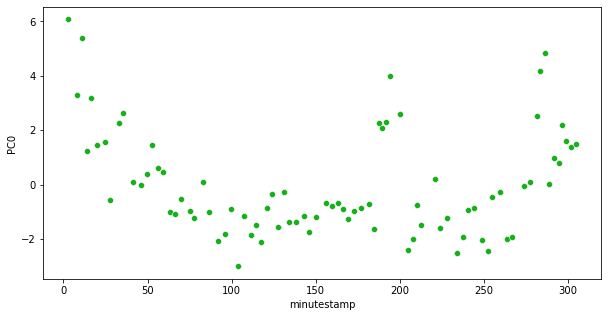

In [95]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=MARATHON,x='minutestamp',y='PC0',color='#15B01A')
plt.show

Finding whether there is a statisticaly significant difference between the mean PCs scores per 20 min interval for both PC0 and PC1 to validate the use of PCs

In [19]:
bins=pd.cut(MARATHON['minutestamp'],bins=15)
MARATHON['bins']=bins

In [20]:
for_z=MARATHON.groupby('bins').mean()[['PC0','PC1']]
for_z

PC0       PC1
bins                                  
(2.573, 22.977]     3.433196  0.486901
(22.977, 43.081]    1.203313 -0.074447
(43.081, 63.184]    0.586034 -0.089475
(63.184, 83.288]   -0.783747  0.156887
(83.288, 103.391]  -1.449609  2.130062
(103.391, 123.495] -1.740272  0.341962
(123.495, 143.598] -1.016878  0.154581
(143.598, 163.701] -1.001551 -0.755871
(163.701, 183.805] -0.932919 -0.381907
(183.805, 203.908]  1.938361  0.239976
(203.908, 224.012] -1.280030  0.294995
(224.012, 244.115] -1.502226 -0.414383
(244.115, 264.219] -1.443581 -0.109589
(264.219, 284.322]  0.961901 -0.423910
(284.322, 304.425]  1.670249 -0.826846

In [21]:
for i in list(for_z['PC0']):
    print(ztest(for_z['PC0'], value=i))

(-8.563271471220668, 1.0970920548176359e-17)
(-3.144245788061558, 0.0016651551646706612)
(-1.64414353127672, 0.10014655790538146)
(1.6846767272411485, 0.09205095900013546)
(3.302843746451377, 0.0009570970255682909)
(4.009206647667284, 6.09230852106947e-05)
(2.251226218584833, 0.02437121310823136)
(2.2139792293151643, 0.02683020779318426)
(2.0471913337989585, 0.0406393020000441)
(-4.930546226452797, 8.200000921697853e-07)
(2.8907342771639715, 0.00384342942013568)
(3.4307111737641014, 0.0006020012000865755)
(3.288194535077079, 0.0010083213953805104)
(-2.5575700837979842, 0.010540631572564685)
(-4.278986788254192, 1.8774600541403427e-05)


<function matplotlib.pyplot.show(close=None, block=None)>

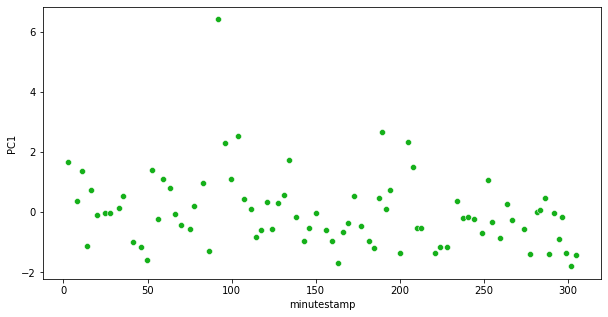

In [94]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=MARATHON,x='minutestamp',y='PC1', color='#15B01A')
plt.show

In [23]:
for i in list(for_z['PC1']):
    print(ztest(for_z['PC1'], value=i))

(-2.430978764631182, 0.015058097076510664)
(0.682434491488479, 0.49496425217517115)
(0.7657807120682412, 0.44380679266204226)
(-0.6006151569063334, 0.5480963403439476)
(-11.54445018739292, 7.87433808318677e-31)
(-1.6271005897138737, 0.10371573581869017)
(-0.5878266311467477, 0.5566486668123871)
(4.461820912730529, 8.126613039675528e-06)
(2.3877028704188685, 0.016954042658814106)
(-1.0614549586141069, 0.2884831919197963)
(-1.3666041420393318, 0.1717494182275261)
(2.567821144301465, 0.010233994442452063)
(0.8773385924692498, 0.3803027563233704)
(2.620663802135263, 0.00877587593062979)
(4.855467904832399, 1.201028069273516e-06)


Investigating the PCs


In [24]:
variance = Marathon_pca.explained_variance_ratio_
cum_variance = np.cumsum(variance)
cum_variance

array([0.4132006 , 0.57997396])

In [25]:
marathon_sca_pca=pd.concat((marathon_sca,Marathon_transformed,),axis=1)
marathon_sca_pca.corr()[['PC0','PC1']]

PC0           PC1
danceability     -7.933523e-01  6.117442e-02
energy           -8.235700e-01 -1.678783e-01
loudness         -8.436269e-01 -1.047598e-01
speechiness      -3.009125e-01  6.466929e-01
acousticness      6.999940e-01  4.555644e-01
instrumentalness  7.147086e-01 -1.684972e-01
liveness         -3.159791e-01  7.042205e-01
valence          -6.781040e-01  1.162753e-01
tempo            -2.200171e-01 -5.426525e-01
PC0               1.000000e+00  9.058698e-17
PC1               9.058698e-17  1.000000e+00

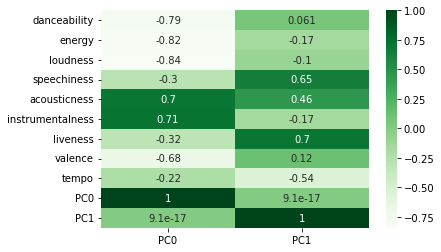

In [100]:
sns.heatmap((marathon_sca_pca.corr()[['PC0','PC1']]), annot=True, cmap="Greens")
plt.show()

PC0 Marathonability

In [27]:
marathon["classif_energy"] = pd.qcut(
    marathon["energy"], 3, labels=["LowEnergy", "MidEnergy", "HighEnergy"]
)
marathon["classif_dance"] = pd.qcut(
    marathon["danceability"], 3, labels=["NotDancy", "MidDancy", "Dancefloor"]
)
marathon["classif_loudness"] = pd.qcut(
    marathon["loudness"], 3, labels=["Quiet", "MidLoud", "Loud"]
)
marathon["classif_acousticness"] = pd.qcut(
    marathon["acousticness"], 3, labels=["NotAcoustic", "MidAcoustic", "VeryAcoustic"]
)

In [112]:
pex.sunburst(
    marathon,
    path=["classif_loudness","classif_energy","classif_dance","classif_acousticness", "track.name"],
)

In [134]:
M=marathon[sfeat]
M['minutestamp']=marathon['minutestamp']
M['PC0']=MARATHON['PC0']
M['PC1']=MARATHON['PC1']
M.to_csv('MA.csv')

danceability  energy  loudness  speechiness  acousticness  \
0          0.336   0.044   -29.255       0.0456       0.98200   
1          0.447   0.449   -10.634       0.0376       0.93400   
2          0.136   0.164   -18.756       0.0364       0.91100   
3          0.305   0.460    -9.463       0.0295       0.00468   
4          0.307   0.136   -12.474       0.0341       0.92800   
..           ...     ...       ...          ...           ...   
78         0.443   0.827   -11.781       0.0469       0.00364   
79         0.250   0.553    -8.188       0.0429       0.60600   
80         0.307   0.701   -10.546       0.0658       0.03070   
81         0.399   0.692   -10.190       0.0735       0.05090   
82         0.250   0.788    -7.263       0.0574       0.04440   

    instrumentalness  liveness  valence    tempo  minutestamp       PC0  \
0             0.9600    0.2210   0.0666   90.243     2.874067  6.072221   
1             0.9610    0.0697   0.0360   92.468     8.131183  3.299471   
2             0.9160    0.1090   0.0710   58.303    10.912300  5.379775   
3             0.3800    0.0777   0.4100  128.414    13.734517  1.230501   
4             0.0122    0.1090   0.1660  110.010    16.473233  3.170219   
..               ...       ...      ...      ...          ...       ...   
78            0.8360    0.2610   0.2850  140.014   294.419483  0.807953   
79            0.6730    0.1450   0.2260  118.985   296.475483  2.204976   
80            0.8170    0.0953   0.0862  140.131   299.012450  1.611696   
81            0.9510    0.1130   0.0752  170.993   301.826933  1.368891   
82            0.9190    0.0904   0.0344  129.733   304.425467  1.495847   

         PC1  
0   1.669228  
1   0.372181  
2   1.365467  
3  -1.127401  
4   0.733769  
..       ...  
78 -0.878828  
79 -0.173843  
80 -1.363684  
81 -1.803315  
82 -1.426961  

[83 rows x 12 columns]

Bring in your liked songs

In [29]:
CLIENT_ID = "e83d3836d10b4d06a00845db78de3dfb"
CLIENT_SECRET = "6aab53d5a2074b6d9552fb767cdf142c"

auth_manager = SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET
)
spotify = spotipy.Spotify(client_credentials_manager=auth_manager)

In [30]:
liked_songs=['https://open.spotify.com/playlist/0ygkDmQU8WKFHsR7LwiztI',
             'https://open.spotify.com/playlist/4GxGb7D4ct1JT8iQu9fBY8',
             'https://open.spotify.com/playlist/1vfXcHY6EmmJYhEOQcZfKJ',
             'https://open.spotify.com/playlist/6tetitu7NqbFwNqADgUUQy',
             'https://open.spotify.com/playlist/5sPnLfRFNK9SIDiq6HAjZ9',
             'https://open.spotify.com/playlist/7seGteU0tGuKqVtxT5brg5']

In [31]:
liked=pd.DataFrame()
for i in liked_songs:
    y=playlisttodf(i)
    liked=pd.concat((liked,y))

In [32]:
liked

track.name  danceability  energy  \
0                        Put Your Head on My Shoulder         0.549   0.433   
1                                         Padam padam         0.385   0.283   
2                                 J'm'en fous pas mal         0.427   0.374   
3                                            Heureuse         0.289   0.218   
4                                              Exodus         0.258   0.357   
..                                                ...           ...     ...   
13                                    Mystery of Love         0.365   0.273   
14                                         Apocalypse         0.370   0.467   
15  Vivaldi: The Four Seasons, Violin Concerto in ...         0.362   0.569   
16                                         Experience         0.447   0.449   
17                                    Spring 1 - 2012         0.701   0.341   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0     7    -8.526     1       0.0327        0.9060          0.010800   
1     5    -8.013     0       0.0546        0.7800          0.000000   
2     5    -9.925     0       0.0759        0.9800          0.000000   
3     0    -8.587     1       0.0387        0.9640          0.000132   
4     8    -8.713     0       0.0294        0.7890          0.000007   
..  ...       ...   ...          ...           ...               ...   
13    4   -16.526     0       0.0380        0.9400          0.431000   
14    5    -9.013     1       0.0273        0.0205          0.572000   
15    7   -15.394     0       0.0345        0.8760          0.910000   
16    2   -10.634     1       0.0376        0.9340          0.961000   
17    1   -12.260     0       0.0418        0.4990          0.903000   

    liveness  ...            type                      id  \
0     0.0774  ...  audio_features  7eqNATKM78MkWP6aHGXHEV   
1     0.0726  ...  audio_features  194uD6fRM58ztn7Z1Mfyr2   
2     0.3820  ...  audio_features  5lGe7LrFSl53vbL1N2p5nt   
3     0.1320  ...  audio_features  5NvtYYIYViQ2uV0fzoBTIi   
4     0.0812  ...  audio_features  7pgAZyxlGqmFlGp7zeY9iz   
..       ...  ...             ...                     ...   
13    0.1090  ...  audio_features  0MNNKSUU9OOQ8DSGWduw79   
14    0.1090  ...  audio_features  0yc6Gst2xkRu0eMLeRMGCX   
15    0.3270  ...  audio_features  2nnXe7n3Vivs7OfQKRsfWD   
16    0.0697  ...  audio_features  1BncfTJAWxrsxyT9culBrj   
17    0.3590  ...  audio_features  5xbuJuQsTVheVZvX2AJVIv   

                                     uri  \
0   spotify:track:7eqNATKM78MkWP6aHGXHEV   
1   spotify:track:194uD6fRM58ztn7Z1Mfyr2   
2   spotify:track:5lGe7LrFSl53vbL1N2p5nt   
3   spotify:track:5NvtYYIYViQ2uV0fzoBTIi   
4   spotify:track:7pgAZyxlGqmFlGp7zeY9iz   
..                                   ...   
13  spotify:track:0MNNKSUU9OOQ8DSGWduw79   
14  spotify:track:0yc6Gst2xkRu0eMLeRMGCX   
15  spotify:track:2nnXe7n3Vivs7OfQKRsfWD   
16  spotify:track:1BncfTJAWxrsxyT9culBrj   
17  spotify:track:5xbuJuQsTVheVZvX2AJVIv   

                                           track_href  \
0   https://api.spotify.com/v1/tracks/7eqNATKM78Mk...   
1   https://api.spotify.com/v1/tracks/194uD6fRM58z...   
2   https://api.spotify.com/v1/tracks/5lGe7LrFSl53...   
3   https://api.spotify.com/v1/tracks/5NvtYYIYViQ2...   
4   https://api.spotify.com/v1/tracks/7pgAZyxlGqmF...   
..                                                ...   
13  https://api.spotify.com/v1/tracks/0MNNKSUU9OOQ...   
14  https://api.spotify.com/v1/tracks/0yc6Gst2xkRu...   
15  https://api.spotify.com/v1/tracks/2nnXe7n3Vivs...   
16  https://api.spotify.com/v1/tracks/1BncfTJAWxrs...   
17  https://api.spotify.com/v1/tracks/5xbuJuQsTVhe...   

                                         analysis_url duration_ms  \
0   https://api.spotify.com/v1/audio-analysis/7eqN...      155080   
1   https://api.spotify.com/v1/audio-analysis/194u...      197627   
2   https://api.spotify.com/v1/audio-analysis/5lGe...      260120   
3   ht

Scale the liked data set.

In [33]:
sfeat=['danceability', 'energy', 'loudness','speechiness',
       'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
scaler = StandardScaler()
scaler.fit(liked[sfeat])
liked_sca = pd.DataFrame(
    scaler.transform(liked[sfeat]), columns=scaler.feature_names_in_
)

Transform using the PCA fitted to your marathon list.

In [52]:
liked_transformed= pd.DataFrame(
    Marathon_pca.transform(liked_sca),
    columns=["PC" + str(i) for i in range(Marathon_pca.n_components_)],
)

In [53]:
liked_transformed.head()

PC0       PC1
0  0.115993  0.038524
1  0.114489 -0.775697
2  0.407598  2.335049
3  1.517708  0.398762
4  1.179329  0.103125

In [54]:
like_pca=pd.concat((liked.reset_index(),liked_transformed),axis=1)
like_pca.drop(columns=('index'),inplace=True)

In [132]:
like_pca.head()

track.name  danceability  energy  key  loudness  mode  \
0  Put Your Head on My Shoulder         0.549   0.433    7    -8.526     1   
1                   Padam padam         0.385   0.283    5    -8.013     0   
2           J'm'en fous pas mal         0.427   0.374    5    -9.925     0   
3                      Heureuse         0.289   0.218    0    -8.587     1   
4                        Exodus         0.258   0.357    8    -8.713     0   

   speechiness  acousticness  instrumentalness  liveness  ...  \
0       0.0327         0.906          0.010800    0.0774  ...   
1       0.0546         0.780          0.000000    0.0726  ...   
2       0.0759         0.980          0.000000    0.3820  ...   
3       0.0387         0.964          0.000132    0.1320  ...   
4       0.0294         0.789          0.000007    0.0812  ...   

                                    uri  \
0  spotify:track:7eqNATKM78MkWP6aHGXHEV   
1  spotify:track:194uD6fRM58ztn7Z1Mfyr2   
2  spotify:track:5lGe7LrFSl53vbL1N2p5nt   
3  spotify:track:5NvtYYIYViQ2uV0fzoBTIi   
4  spotify:track:7pgAZyxlGqmFlGp7zeY9iz   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7eqNATKM78Mk...   
1  https://api.spotify.com/v1/tracks/194uD6fRM58z...   
2  https://api.spotify.com/v1/tracks/5lGe7LrFSl53...   
3  https://api.spotify.com/v1/tracks/5NvtYYIYViQ2...   
4  https://api.spotify.com/v1/tracks/7pgAZyxlGqmF...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/7eqN...      155080   
1  https://api.spotify.com/v1/audio-analysis/194u...      197627   
2  https://api.spotify.com/v1/audio-analysis/5lGe...      260120   
3  https://api.spotify.com/v1/audio-analysis/5Nvt...      197973   
4  https://api.spotify.com/v1/audio-analysis/7pgA...      210333   

  time_signature track_number_inlist minutestamp  original_playlist       PC0  \
0              3                   1    2.584667             liked1  0.115993   
1              3                   2    5.878450             liked1  0.114489   
2              3                   3   10.213783             liked1  0.407598   
3              3                   4   13.513333             liked1  1.517708   
4              4                   5   17.018883             liked1  1.179329   

        PC1  
0  0.038524  
1 -0.775697  
2  2.335049  
3  0.398762  
4  0.103125  

[5 rows x 24 columns]

In [135]:
L=liked[sfeat]
L['minutestamp']=liked['minutestamp']
L['PC0']=like_pca['PC0']
L['PC1']=like_pca['PC1']
L.to_csv('LA.csv')

## Recommender System

Based on the two PCAs make a list of the 10 best replacements per song.

In [58]:
for_cosine=pd.concat((liked_transformed,liked_sca),axis=1)

In [60]:
for_cosine.head()

PC0       PC1  danceability    energy  loudness  speechiness  \
0  0.115993  0.038524      0.388309 -0.230513  0.285968    -0.381685   
1  0.114489 -0.775697     -0.456634 -0.824704  0.393833     0.096792   
2  0.407598  2.335049     -0.240246 -0.464228 -0.008190     0.562159   
3  1.517708  0.398762     -0.951234 -1.082187  0.273142    -0.250596   
4  1.179329  0.103125     -1.110949 -0.531569  0.246649    -0.453784   

   acousticness  instrumentalness  liveness   valence     tempo  
0      1.259694         -0.546958 -0.674814  0.364651 -0.052190  
1      0.897928         -0.577957 -0.706071  0.627903  2.145784  
2      1.472159         -0.577957  1.308673  0.179262 -1.331662  
3      1.426221         -0.577578 -0.319271 -1.014643 -0.279159  
4      0.923769         -0.577936 -0.650069 -0.606787 -0.800684

In [61]:
cosine_similarities = cosine_similarity(for_cosine) 

In [62]:
liked_cosine=pd.DataFrame(cosine_similarities)
liked_cosine.head()

0         1         2         3         4         5         6    \
0  1.000000  0.428728  0.226870  0.451517  0.440525  0.764776  0.312194   
1  0.428728  1.000000 -0.320905  0.226882  0.083151  0.159792  0.875656   
2  0.226870 -0.320905  1.000000  0.432338  0.329846  0.523789 -0.071517   
3  0.451517  0.226882  0.432338  1.000000  0.916351  0.191879  0.442894   
4  0.440525  0.083151  0.329846  0.916351  1.000000  0.239045  0.213903   

        7         8         9    ...       507       508       509       510  \
0  0.373004  0.555162 -0.067030  ... -0.006134  0.030502 -0.221743 -0.130779   
1 -0.267108 -0.143806  0.138382  ...  0.216522 -0.068111 -0.427985 -0.105798   
2  0.874614  0.824442 -0.080164  ...  0.079396 -0.291434  0.795499  0.134453   
3  0.585194  0.312479  0.516879  ... -0.296202 -0.745470 -0.064144  0.605237   
4  0.614838  0.335672  0.431200  ... -0.411462 -0.593977 -0.171238  0.587763   

        511       512       513       514       515       516  
0  0.316452  0.242307 -0.482774 -0.034292  0.130754 -0.264364  
1 -0.188386  0.272895 -0.355587  0.181123 -0.164350 -0.442829  
2  0.655254  0.118215 -0.485157  0.107258  0.103179  0.241642  
3  0.372007  0.692280  0.010635  0.027296  0.557402  0.076931  
4  0.127660  0.570081  0.197515 -0.084236  0.528797 -0.112163  

[5 rows x 517 columns]

In [63]:
similarities = {}
for i in range(len(cosine_similarities)): 
    similar_indices = cosine_similarities[i].argsort()[:-20:-1] 
    similarities[like_pca['track.name'].iloc[i]] = [(cosine_similarities[i][x],like_pca['track.name'][x]) for x in similar_indices][1:]

In [64]:
similarities_df=pd.DataFrame(similarities)
similarities_df.head()

Put Your Head on My Shoulder  \
0  (0.9035317725358086, Puerto de Ilusión)   
1  (0.8567091051294161, Someone You Loved)   
2        (0.8536508606192027, Cama y Mesa)   
3            (0.8477790675372443, Matilda)   
4      (0.8338045591452373, Night Changes)   

                                   Padam padam  \
0             (0.9253567615351853, Creo en Ti)   
1    (0.9241291416427063, Ya No Te Hago Falta)   
2                (0.8909409248244454, Eres Tú)   
3       (0.8831530194156209, You belong to me)   
4  (0.8756563807043226, Sous le ciel de Paris)   

                                 J'm'en fous pas mal  \
0  (0.8958161974570154, Requiem in D Minor, K. 62...   
1               (0.8746144498902293, La vie en rose)   
2  (0.8727215221916496, Audition (The Fools Who D...   
3               (0.8501212206251817, La Vie En Rose)   
4            (0.8432020444074826, Mister Cellophane)   

                                            Heureuse  \
0                  (0.9476048102536482, I'm on Fire)   
1                 (0.9223881382010184, Turning Page)   
2   (0.9193394454041828, Don't Cry for Me Argentina)   
3  (0.9173054588142764, Turandot, SC 91 / Act III...   
4                       (0.9163513283917695, Exodus)   

                                              Exodus  \
0  (0.9413278445761135, Both Sides Now (From "Lov...   
1                 (0.9382759068693942, One Day More)   
2  (0.9166363698097456, Turandot, SC 91 / Act III...   
3                     (0.9163513283917695, Heureuse)   
4  (0.9143006478166519, Grândola Vila Morena (Req...   

                                              Milord  \
0                     (0.8561926660721697, La foule)   
1            (0.8176778958410538, Someone You Loved)   
2                (0.787375286011065, Come On Eileen)   
3  (0.7647762754607668, Put Your Head on My Shoul...   
4            (0.7633810326587821, Puerto de Ilusión)   

                               Sous le ciel de Paris  \
0                (0.9578172521469438, Dance with Me)   
1                   (0.9567910188627883, Creo en Ti)   
2              (0.916931984454285, You belong to me)   
3  (0.9156830672956917, I Have A Dream - From 'Ma...   
4                       (0.8884181893431129, Uretan)   

                                      La vie en rose  \
0     (0.9218945931420134, Non, je ne regrette rien)   
1  (0.8855460391529087, Do You Hear The People Si...   
2          (0.8746144498902293, J'm'en fous pas mal)   
3  (0.8659092504457766, Audition (The Fools Who D...   
4                     (0.8452967001730342, La foule)   

                                            La foule  \
0                       (0.8561926660721697, Milord)   
1               (0.8452967001730342, La vie en rose)   
2  (0.831338828884536, Do You Hear The People Sing?)   
3          (0.8244416097049464, J'm'en fous pas mal)   
4         (0.8229408622262318, The Way You Loved Me)   

                                               Birki  ...  \
0  (0.9796903754198744, Áss hinn hvíti (with Stei...  ...   
1    (0.9725264120457191, 64º08'43.3"N 21º55'38.8"W)  ...   
2           (0.9715085893153237, Requiem: Lacrimosa)  ...   
3    (0.9614529962107891, 65º27'29.1"N 15º31'56.0"W)  ...   
4                  (0.9577766020491383, Lux Aeterna)  ...   

                   Transatlántico - Versión Acústica  \
0                (0.8277629755455788, All That Jazz)   
1             (0.7354794124964794, Cell Block Tango)   
2           (0.7125658495259712, Lejos de la ciudad)   
3  (0.7117022086073788, Hasta la Raíz - Spotify S...   
4                      (0.6945409178697554, Milagro)   

                               Cada Quien  \
0  (0.9843686352159524, Mi primer millon)   
1              (0.9842947407880596, Rise)   
2     (0.9822072775282671, Tacones Rojos)   
3          (0.9693708531520785, Caraluna)   
4            (0.9686838423275265, Gloria)   

                               Ya Supérame (En Vivo)  \
0                   (0.9130484288959884, Prome

In [65]:
songs_from_marathon=list(marathon['track.name'])
recommender_chart=similarities_df[songs_from_marathon]
recommender_chart.head()

A Model of the Universe  \
0  (0.992221385814773, Le Carnaval des Animaux: A...   
1  (0.9744622354259218, Svefn - G - Englar - (Int...   
2       (0.9727053530245606, Simon and Lady Danbury)   
3    (0.9720023321451918, Main Title (The Notebook))   
4    (0.9586899398257354, 64º46'34.1"N 14º02'55.8"W)   

                                          Experience  \
0         (0.9831965437020735, Samskeyti (Acoustic))   
1                    (0.9435574213518493, Varðeldur)   
2                    (0.9260842044180762, Dies Irae)   
3  (0.9044503017907215, Strange (feat. Hillary Sm...   
4                      (0.9038528932298099, Valtari)   

  Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10, Scene. Moderato  \
0                 (0.9976477114997342, Fjögur píanó)                
1                 (0.9947883921238909, Fjögur píanó)                
2            (0.9878493855430941, Visions of Gideon)                
3  (0.9851747154211836, Strange (feat. Hillary Sm...                
4  (0.9831212699884712, Beethoven: Symphony No. 7...                

             La Vida Es Bella - La Vida Es Bella  \
0               (0.8814018832131201, Hoppípolla)   
1               (0.854843031231678, Rembihnútur)   
2              (0.8501173096968712, Rembihnútur)   
3  (0.8328678092459852, Untitled #8 - Popplagið)   
4                   (0.8264739845911999, Myrkur)   

                                         I'm on Fire  \
0     (0.98941192862493, Don't Cry for Me Argentina)   
1                       (0.9792336483109982, Heaven)   
2  (0.9635699050717927, I Follow Rivers - The Los...   
3  (0.9592750803680317, I Dreamed A Dream - From ...   
4  (0.9511866948974546, I Dreamed A Dream - From ...   

                                    Confieso  \
0     (0.8613684068482413, You belong to me)   
1          (0.8530641565311039, Padam padam)   
2  (0.8370163972096241, Ya No Te Hago Falta)   
3        (0.8157570275196336, Dance with Me)   
4             (0.8149485103888154, Disfruto)   

                                    Youth  \
0         (0.833412883367885, Creo en Ti)   
1  (0.8275312949006113, You belong to me)   
2            (0.8227008703452687, Uretan)   
3     (0.8132435091704555, Dance with Me)   
4         (0.8121865948237031, Le Festin)   

                                    To Love Somebody  \
0             (0.9476008680807245, De Momento Abril)   
1  (0.9284246287894214, Ámame Hasta Con Los Dientes)   
2                   (0.9272149143025552, Take on Me)   
3                   (0.9272149143025552, Take on Me)   
4     (0.9234094367665966, El amor después del amor)   

                          What About Us  \
0            (0.94369826734209, Mañana)   
1        (0.9284753031444605, Disfruto)   
2     (0.9060022887470865, In My Blood)   
3  (0.9059208508943934, Heart Of Stone)   
4       (0.9045484663171831, Compartir)   

                   Sign of the Times - Stripped  ...  \
0       (0.9750883875907497, Dancing On My Own)  ...   
1               (0.9235030640972721, Varðeldur)  ...   
2  (0.9024291585028703, Simon and Lady Danbury)  ...   
3             (0.8848425518204504, Lux Aeterna)  ...   
4           (0.8815268974315338, Wrecking Ball)  ...   

                              Requiem For A Tower  \
0             (0.979069448652945, Hjartao hamast)   
1  (0.9485866951267589, Viorar Vel Til Loftarasa)   
2        (0.9180335348197625, Svefn - G - Englar)   
3                 (0.9069677433851031, Staralfur)   
4                     (0.9031109818339204, Varúð)   

                                Courtyard Apocalypse  \
0              (0.9854399923096762, Voldemort's End)   
1  (0.9745517749418968, Pachelbel: Canon and Gigu...   
2                    (0.9707880183778237, Ekki múkk)   
3      (0.9626150493796707, Untitled #3 - Samskeyti)   
4              (0.9612895193742651, You Oughta Know)   

                                     Voldemort's End  \
0  (0.9902653345419276, Pachelbel: Canon and Gigu...   
1         (0.9854399923096762

Produce a random playlist from recommender chart

In [66]:
rec_chart_T=recommender_chart.transpose()
rec_chart_T.head()

0   \
A Model of the Universe                             (0.992221385814773, Le Carnaval des Animaux: A...   
Experience                                                 (0.9831965437020735, Samskeyti (Acoustic))   
Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10,...                 (0.9976477114997342, Fjögur píanó)   
La Vida Es Bella - La Vida Es Bella                                  (0.8814018832131201, Hoppípolla)   
I'm on Fire                                            (0.98941192862493, Don't Cry for Me Argentina)   

                                                                                                   1   \
A Model of the Universe                             (0.9744622354259218, Svefn - G - Englar - (Int...   
Experience                                                            (0.9435574213518493, Varðeldur)   
Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10,...                 (0.9947883921238909, Fjögur píanó)   
La Vida Es Bella - La Vida Es Bella                                  (0.854843031231678, Rembihnútur)   
I'm on Fire                                                              (0.9792336483109982, Heaven)   

                                                                                                   2   \
A Model of the Universe                                  (0.9727053530245606, Simon and Lady Danbury)   
Experience                                                            (0.9260842044180762, Dies Irae)   
Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10,...            (0.9878493855430941, Visions of Gideon)   
La Vida Es Bella - La Vida Es Bella                                 (0.8501173096968712, Rembihnútur)   
I'm on Fire                                         (0.9635699050717927, I Follow Rivers - The Los...   

                                                                                                   3   \
A Model of the Universe                               (0.9720023321451918, Main Title (The Notebook))   
Experience                                          (0.9044503017907215, Strange (feat. Hillary Sm...   
Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10,...  (0.9851747154211836, Strange (feat. Hillary Sm...   
La Vida Es Bella - La Vida Es Bella                     (0.8328678092459852, Untitled #8 - Popplagið)   
I'm on Fire                                         (0.9592750803680317, I Dreamed A Dream - From ...   

                                                                                                   4   \
A Model of the Universe                               (0.9586899398257354, 64º46'34.1"N 14º02'55.8"W)   
Experience                                                              (0.9038528932298099, Valtari)   
Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10,...  (0.9831212699884712, Beethoven: Symphony No. 7...   
La Vida Es Bella - La Vida Es Bella                                      (0.8264739845911999, Myrkur)   
I'm on Fire                                         (0.9511866948974546, I Dreamed A Dream - From ...   

                                                                                                   5   \
A Model of the Universe                               (0.9514889028413368, 64º08'43.3"N 21º55'38.8"W)   
Experience                                                            (0.9009142836769104, Varðeldur)   
Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10,...  (0.9808340760666127, Pachelbel: Canon and Gigu...   
La Vida Es Bella - La Vida Es Bella                 (0.8080042809966543, Overture - From 'The Phan...   
I'm on Fire                                                            (0.9476048102536482, Heureuse)   

                                                                                                   6   \
A Model of the Universe                             (0.9467603080079188, Beethoven: Symphony No. 7...   
Experience                                            (0.8990548244584238, 63º47'36.2"N 18º02'16.9"W)  

In [67]:
indices = np.random.choice(np.arange(len(rec_chart_T.columns)), len(rec_chart_T), replace=True)

In [68]:
created_playlists=pd.DataFrame()
for i in range(5):
    indices = np.random.choice(np.arange(len(rec_chart_T.columns)), len(rec_chart_T), replace=True)
    created_playlists[f'random{i}'] = rec_chart_T.to_numpy()[np.arange(len(rec_chart_T)), indices]

In [69]:
created_playlists

random0  \
0                 (0.9208556044341065, Wrecking Ball)   
1                       (0.9038528932298099, Valtari)   
2                     (0.9648025111603302, Dies Irae)   
3                    (0.7423252145740752, Apocalypse)   
4                      (0.9476048102536482, Heureuse)   
..                                                ...   
78                  (0.7203002849038406, Rembihnútur)   
79     (0.8552195204647982, Viorar Vel Til Loftarasa)   
80  (0.9002790499483161, Moonlight Sonata - Epic T...   
81                   (0.8446499044073296, To Victory)   
82                (0.9663987194600584, Divine Hammer)   

                                              random1  \
0   (0.9294999441813775, Áss hinn hvíti (with Stei...   
1                     (0.9009142836769104, Varðeldur)   
2   (0.9808340760666127, Pachelbel: Canon and Gigu...   
3                   (0.8501173096968712, Rembihnútur)   
4                      (0.9476048102536482, Heureuse)   
..                                                ...   
78  (0.6823836497969445, Is She With You? - Wonder...   
79                  (0.8752358759249752, Olsen Olsen)   
80      (0.9316740064672752, Untitled #8 - Popplagið)   
81                   (0.8446499044073296, To Victory)   
82                  (0.8121299718002907, Olsen Olsen)   

                                              random2  \
0   (0.9294999441813775, Áss hinn hvíti (with Stei...   
1   (0.8649834543919566, Sign of the Times - Strip...   
2               (0.9606650678842943, You Oughta Know)   
3       (0.8328678092459852, Untitled #8 - Popplagið)   
4                      (0.9476048102536482, Heureuse)   
..                                                ...   
78                  (0.7149101621651529, Rembihnútur)   
79                (0.8534510479269967, Með Blóðnasir)   
80         (0.8306366231126703, Við spilum endalaust)   
81                (0.9486086425226528, Divine Hammer)   
82  (0.8322839861369608, Is She With You? - Wonder...   

                                              random3  \
0   (0.9362046501632548, Spár eða spakmál (with St...   
1     (0.8990548244584238, 63º47'36.2"N 18º02'16.9"W)   
2            (0.9800836961428985, Untitled #1 - Vaka)   
3                    (0.7423252145740752, Apocalypse)   
4   (0.9024304662752689, Cayendo (Side A - Acoustic))   
..                                                ...   
78                       (0.8190635006585831, Myrkur)   
79                      (0.9024330664256821, Ég anda)   
80  (0.9002790499483161, Moonlight Sonata - Epic T...   
81                  (0.8502235141193065, Rembihnútur)   
82                        (0.8251307217020013, Salka)   

                                              random4  
0            (0.9435634241164685, Requiem: Lacrimosa)  
1       (0.8782294055005228, Untitled #3 - Samskeyti)  
2   (0.9808340760666127, Pachelbel: Canon and Gigu...  
3                    (0.854843031231678, Rembihnútur)  
4                  (0.9136846122264932, One Day More)  
..                                                ...  
78                     (0.811751279625639, Sandstorm)  
79           (0.9565386675803801, Svefn - G - Englar)  
80                (0.8408889727957367, Með Blóðnasir)  
81              (0.7559714758100644, Flugufrelsarinn)  
82  (0.878682945469917, Moonlight Sonata - Epic Tr...  

[83 rows x 5 columns]